In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten


In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
import numpy as np
num_classes = len (np.unique(y_train))
print("Number of classes: ", num_classes)

Number of classes:  10


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

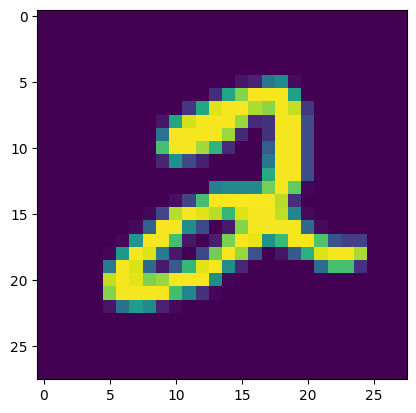

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[5]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten (input_shape=(28,28)))
model.add(Dense (128, activation='relu'))
model.add(Dense (32, activation= 'relu'))
model.add(Dense (10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2879 - accuracy: 0.9152 - val_loss: 0.1549 - val_accuracy: 0.9574
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1196 - accuracy: 0.9649 - val_loss: 0.1109 - val_accuracy: 0.9664
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0824 - accuracy: 0.9750 - val_loss: 0.1149 - val_accuracy: 0.9648
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.0995 - val_accuracy: 0.9723
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0471 - accuracy: 0.9848 - val_loss: 0.0951 - val_accuracy: 0.9732
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0395 - accuracy: 0.9869 - val_loss: 0.0998 - val_accuracy: 0.9719
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.1064 - val_accuracy

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)

313/313 [==============================] - 1s 3ms/step
[[3.3890666e-22 5.1668694e-19 5.5617358e-18 ... 9.9999994e-01
  2.0084295e-23 4.7936953e-17]
 [3.0657806e-26 1.6410948e-14 9.9999994e-01 ... 3.3792301e-29
  5.0624066e-10 0.0000000e+00]
 [9.7634272e-17 9.9999994e-01 2.6411053e-14 ... 2.6044087e-13
  1.9508692e-09 8.4922304e-24]
 ...
 [1.2774356e-36 1.8370911e-25 1.0254441e-33 ... 1.9991879e-23
  5.0839585e-24 4.9400299e-20]
 [6.7936203e-32 1.0217994e-36 9.7400404e-37 ... 2.0838857e-29
  1.8605277e-13 3.0326172e-27]
 [7.9574252e-35 0.0000000e+00 1.9480236e-25 ... 0.0000000e+00
  1.5777391e-24 0.0000000e+00]]


In [ ]:
y_pred = y_prob.argmax (axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
class_labels = ['class_0', 'class_1', 'class_2', 'class_3','class_4', 'class_5', 'class_6', 'class_7', 'class_8','class_9']

In [ ]:
y_pred_classes = [class_labels[i] for i in y_pred]
y_pred_classes

['class_7',
 'class_2',
 'class_1',
 'class_0',
 'class_4',
 'class_1',
 'class_4',
 'class_9',
 'class_6',
 'class_9',
 'class_0',
 'class_6',
 'class_9',
 'class_0',
 'class_1',
 'class_5',
 'class_9',
 'class_7',
 'class_3',
 'class_4',
 'class_9',
 'class_6',
 'class_6',
 'class_5',
 'class_4',
 'class_0',
 'class_7',
 'class_4',
 'class_0',
 'class_1',
 'class_3',
 'class_1',
 'class_3',
 'class_4',
 'class_7',
 'class_2',
 'class_7',
 'class_1',
 'class_2',
 'class_1',
 'class_1',
 'class_7',
 'class_4',
 'class_2',
 'class_3',
 'class_5',
 'class_1',
 'class_2',
 'class_4',
 'class_4',
 'class_6',
 'class_3',
 'class_5',
 'class_5',
 'class_6',
 'class_0',
 'class_4',
 'class_1',
 'class_9',
 'class_5',
 'class_7',
 'class_8',
 'class_9',
 'class_3',
 'class_7',
 'class_4',
 'class_6',
 'class_4',
 'class_3',
 'class_0',
 'class_7',
 'class_0',
 'class_2',
 'class_9',
 'class_1',
 'class_7',
 'class_3',
 'class_2',
 'class_9',
 'class_7',
 'class_7',
 'class_6',
 'class_2',
 'cl

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test, y_pred)

0.978

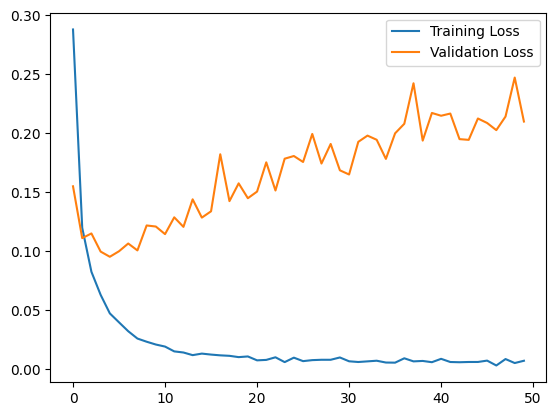

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

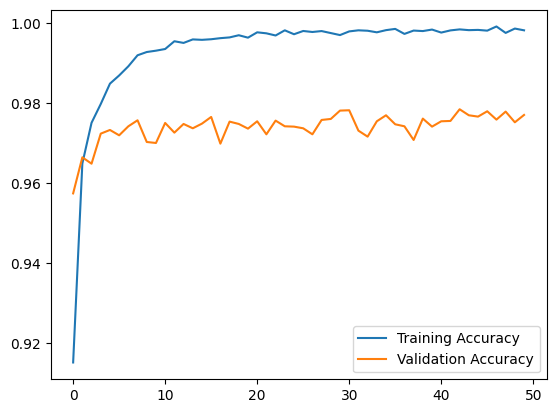

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()


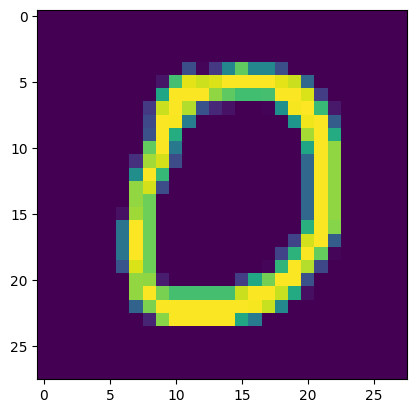

In [ ]:
plt.imshow(X_test[10])


In [ ]:
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 60ms/step


array([0])